In [89]:
import time
import geopandas as gpd
import fiona

import numpy as np
import pylab as pl

from sklearn.cluster import KMeans

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
# Notes
# Errors with visualization due to scaling, but export works
# Not enough time to fix visualization / revert scaling

In [90]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [91]:
df = pd.read_csv("Desktop/carnivore-spotter-export3.csv")

In [92]:
#create geo data from input
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [93]:
print(gdf)

                        ID Vocalization Vocalization Description  \
0     004bY7VnXxLdkBWJXzo2          NaN                      NaN   
1     00DU8HuMgAfnSQ8c1sNl          NaN                      NaN   
2     019mNISChTnqHb1nL0l4          NaN                      NaN   
3     01lmq1DPEzVESIPd77H6          NaN                      NaN   
4     02uhyZOuPIIr6Da5W6oF          NaN                      NaN   
...                    ...          ...                      ...   
2979  zrRU2BxkqJDyRqByYqrx          NaN                      NaN   
2980  zvWMt3J22RhhHrnOrk6u          NaN                      NaN   
2981  zvocZgIiACmKNWy8ihxp          NaN                      NaN   
2982  zwd6agzvqyLYiKRf7Ev4          NaN                      NaN   
2983  zwu7mS0CyFhifwukw3xK          NaN                      NaN   

                                     Carnivore Response  \
0                Animal did not seem to notice observer   
1                                                   NaN   
2     

In [94]:
df = pd.read_csv("Desktop/carnivore-spotter-export3.csv")

In [95]:
print(gdf)

                        ID Vocalization Vocalization Description  \
0     004bY7VnXxLdkBWJXzo2          NaN                      NaN   
1     00DU8HuMgAfnSQ8c1sNl          NaN                      NaN   
2     019mNISChTnqHb1nL0l4          NaN                      NaN   
3     01lmq1DPEzVESIPd77H6          NaN                      NaN   
4     02uhyZOuPIIr6Da5W6oF          NaN                      NaN   
...                    ...          ...                      ...   
2979  zrRU2BxkqJDyRqByYqrx          NaN                      NaN   
2980  zvWMt3J22RhhHrnOrk6u          NaN                      NaN   
2981  zvocZgIiACmKNWy8ihxp          NaN                      NaN   
2982  zwd6agzvqyLYiKRf7Ev4          NaN                      NaN   
2983  zwu7mS0CyFhifwukw3xK          NaN                      NaN   

                                     Carnivore Response  \
0                Animal did not seem to notice observer   
1                                                   NaN   
2     

In [96]:
# Create a output path for the data
outfp = "Desktop/output.shp"

# Select all rows
selection = gdf

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

In [97]:
cols = ['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Latitude', 'Longitude', 'Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs']
df.columns = cols

In [98]:
df = df[(df['Latitude']>minLat)&(df['Latitude']<maxLat)&(df['Longitude']>minLon)&(df['Longitude']<maxLon)]

In [99]:
df['Time_Seen']=pd.to_datetime(df.Time_Seen).copy()

In [100]:
df['Month']=df.Time_Seen.dt.month

In [101]:
summer = df[(df.Month>=6)&(df.Month<=8)] 
fall = df[(df.Month>=9)&(df.Month<=11)]
winter = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]
spring = df[(df.Month>=3)&(df.Month<=5)]

In [102]:
coyo_sum = summer[summer.Species=='Coyote']
coyo_fall = fall[fall.Species=='Coyote']
coyo_winter = winter[winter.Species=='Coyote']
coyo_spring = spring[spring.Species=='Coyote']

In [103]:
#black bear
b_sum = summer[summer.Species=='Black Bear']
b_fall = fall[fall.Species=='Black Bear']
b_winter = winter[winter.Species=='Black Bear']
b_spring = spring[spring.Species=='Black Bear']

In [104]:
#raccoon
r_sum = summer[summer.Species=='Raccoon']
r_fall = fall[fall.Species=='Raccoon']
r_winter = winter[winter.Species=='Raccoon']
r_spring = spring[spring.Species=='Raccoon']

In [105]:
#coyote,black bear, raccoon
cbr_summer = summer[(summer.Species=='Coyote')|(summer.Species=='Black Bear')|(summer.Species=='Raccoon')]
cbr_fall = fall[(fall.Species=='Coyote')|(fall.Species=='Black Bear')|(fall.Species=='Raccoon')]
cbr_winter = winter[(winter.Species=='Coyote')|(winter.Species=='Black Bear')|(winter.Species=='Raccoon')]
cbr_spring = spring[(spring.Species=='Coyote')|(spring.Species=='Black Bear')|(spring.Species=='Raccoon')]

In [106]:
summer = summer.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
fall = fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
winter = winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
spring = spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [107]:
coyo_sum = coyo_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_fall = coyo_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_winter = coyo_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_spring = coyo_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [108]:
b_sum=b_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_fall=b_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_winter=b_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_spring=b_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [109]:
r_sum=r_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_fall=r_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_winter=r_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_spring=r_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [110]:
cbr_summer = cbr_summer.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_fall = cbr_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_winter = cbr_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_spring = cbr_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [111]:
#handle missing data if there is any
summer.fillna(method='bfill',inplace=True)
fall.fillna(method='bfill',inplace=True)
winter.fillna(method='bfill',inplace=True)
spring.fillna(method='bfill',inplace=True)

coyo_sum.fillna(method='bfill',inplace=True)
coyo_fall.fillna(method='bfill',inplace=True)
coyo_winter.fillna(method='bfill',inplace=True)
coyo_spring.fillna(method='bfill',inplace=True)

b_sum.fillna(method='bfill',inplace=True)
b_fall.fillna(method='bfill',inplace=True)
b_winter.fillna(method='bfill',inplace=True) #0sample
b_spring.fillna(method='bfill',inplace=True)

r_sum.fillna(method='bfill',inplace=True)
r_fall.fillna(method='bfill',inplace=True)
r_winter.fillna(method='bfill',inplace=True)
r_spring.fillna(method='bfill',inplace=True)

cbr_summer.fillna(method='bfill',inplace=True)
cbr_fall.fillna(method='bfill',inplace=True)
cbr_winter.fillna(method='bfill',inplace=True)
cbr_spring.fillna(method='bfill',inplace=True)

In [112]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [113]:
#coyote
coyo_summer_scaled=StandardScaler().fit_transform(coyo_sum)
coyo_fall_scaled=StandardScaler().fit_transform(coyo_fall)
coyo_winter_scaled=StandardScaler().fit_transform(coyo_winter)
coyo_spring_scaled=StandardScaler().fit_transform(coyo_spring)

In [114]:
#black bear
b_summer_scaled=StandardScaler().fit_transform(b_sum)
b_fall_scaled=StandardScaler().fit_transform(b_fall)
#b_winter_scaled=StandardScaler().fit_transform(b_winter)
b_spring_scaled=StandardScaler().fit_transform(b_spring)

In [115]:
#raccoon
r_summer_scaled=StandardScaler().fit_transform(r_sum)
r_fall_scaled=StandardScaler().fit_transform(r_fall)
r_winter_scaled=StandardScaler().fit_transform(r_winter)
r_spring_scaled=StandardScaler().fit_transform(r_spring)

In [116]:
#cbr
cbr_summer_scaled=StandardScaler().fit_transform(cbr_summer)
cbr_fall_scaled=StandardScaler().fit_transform(cbr_fall)
cbr_winter_scaled=StandardScaler().fit_transform(cbr_winter)
cbr_spring_scaled=StandardScaler().fit_transform(cbr_spring)

In [117]:
summer_kmeans = KMeans(n_clusters=5)
summer_kmeans.fit(summer)

KMeans(n_clusters=5)

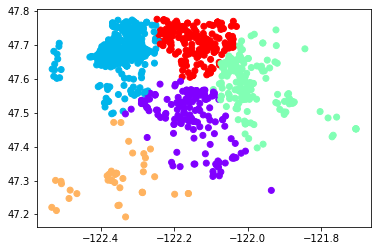

In [118]:
plt.scatter(summer.Longitude,summer.Latitude, c=summer_kmeans.labels_, cmap='rainbow')

In [119]:
print(summer)

       Latitude   Longitude
1     47.683153 -122.127485
3     47.676127 -122.328966
9     47.674193 -122.393790
13    47.688450 -122.118364
15    47.754397 -122.365230
...         ...         ...
2970  47.535762 -122.380838
2971  47.707274 -122.367091
2974  47.554073 -122.093260
2975  47.635350 -122.372837
2981  47.702226 -122.122194

[1114 rows x 2 columns]


In [120]:
gdf_summer = gpd.GeoDataFrame(
    summer, geometry=gpd.points_from_xy(summer.Longitude, summer.Latitude))

In [121]:
print(gdf_summer)

       Latitude   Longitude                     geometry
1     47.683153 -122.127485  POINT (-122.12749 47.68315)
3     47.676127 -122.328966  POINT (-122.32897 47.67613)
9     47.674193 -122.393790  POINT (-122.39379 47.67419)
13    47.688450 -122.118364  POINT (-122.11836 47.68845)
15    47.754397 -122.365230  POINT (-122.36523 47.75440)
...         ...         ...                          ...
2970  47.535762 -122.380838  POINT (-122.38084 47.53576)
2971  47.707274 -122.367091  POINT (-122.36709 47.70727)
2974  47.554073 -122.093260  POINT (-122.09326 47.55407)
2975  47.635350 -122.372837  POINT (-122.37284 47.63535)
2981  47.702226 -122.122194  POINT (-122.12219 47.70223)

[1114 rows x 3 columns]


In [122]:
# Create a output path for the data
outfp = "Desktop/summer.shp"

# Select all rows
selection = gdf_summer

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

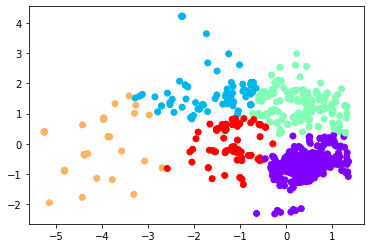

In [123]:
fall_kmeans = KMeans(n_clusters=5)
fall_kmeans.fit(fall_scaled)
plt.scatter(fall_scaled[:,0],fall_scaled[:,1], c=fall_kmeans.labels_, cmap='rainbow')

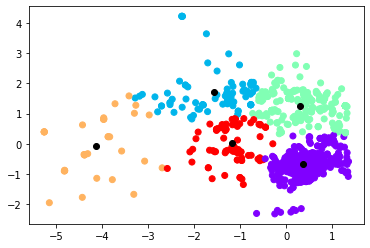

In [124]:
plt.scatter(fall_scaled[:,0], fall_scaled[:,1], c=fall_kmeans.labels_, cmap='rainbow')
plt.scatter(fall_kmeans.cluster_centers_[:,0] ,fall_kmeans.cluster_centers_[:,1], color='black')

In [125]:
winter_kmeans = KMeans(n_clusters=5)
winter_kmeans.fit(winter_scaled)

KMeans(n_clusters=5)

In [126]:
spring_kmeans = KMeans(n_clusters=5)
spring_kmeans.fit(spring_scaled)

KMeans(n_clusters=5)

In [127]:
summer_labels = summer_kmeans.labels_
realClusterNum_summer = len(set(summer_labels))-(1 if -1 in summer_labels else 0)
clusterNum_summer = len(set(summer_labels))
print("realclusterNum_summer",realClusterNum_summer)
print("clusterNum_summer",clusterNum_summer)

realclusterNum_summer 5
clusterNum_summer 5


In [128]:
fall_labels = fall_kmeans.labels_
realClusterNum_fall = len(set(fall_labels))-(1 if -1 in fall_labels else 0)
clusterNum_fall = len(set(fall_labels))
print("realclusterNum_fall",realClusterNum_fall)
print("clusterNum_fall",clusterNum_fall)

realclusterNum_fall 5
clusterNum_fall 5


In [129]:
winter_labels = winter_kmeans.labels_
realClusterNum_winter = len(set(winter_labels))-(1 if -1 in winter_labels else 0)
clusterNum_winter = len(set(winter_labels))
print("realclusterNum_winter",realClusterNum_winter)
print("clusterNum_winter",clusterNum_winter)

realclusterNum_winter 5
clusterNum_winter 5


In [130]:
spring_labels = spring_kmeans.labels_
realClusterNum_spring = len(set(spring_labels))-(1 if -1 in spring_labels else 0)
clusterNum_spring = len(set(spring_labels))
print("realclusterNum_spring",realClusterNum_spring)
print("clusterNum_spring",clusterNum_spring)

realclusterNum_spring 5
clusterNum_spring 5


In [133]:
y_pred_summer = summer_kmeans.fit_predict(summer_scaled)
y_pred_fall = fall_kmeans.fit_predict(fall_scaled)
y_pred_winter = winter_kmeans.fit_predict(winter_scaled)
y_pred_spring = spring_kmeans.fit_predict(spring_scaled)

Text(0.5, 1.0, 'Winter')

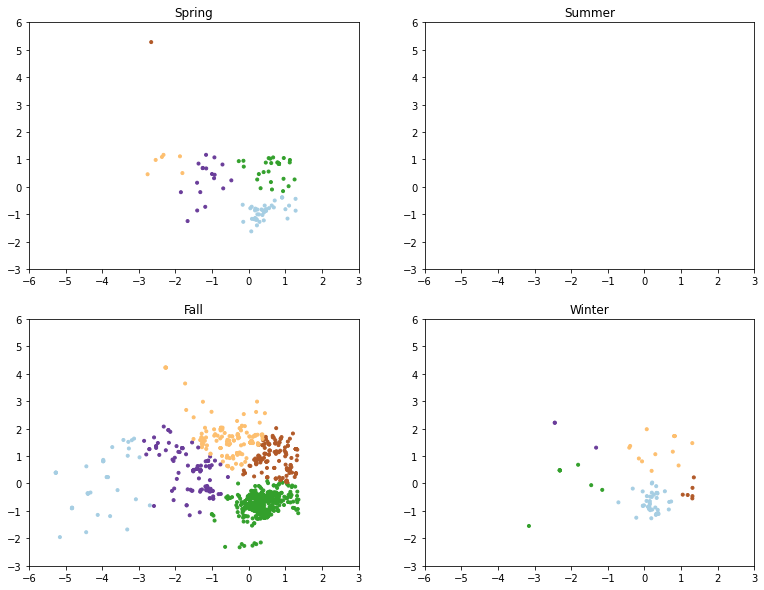

In [134]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring_scaled[:,0],spring_scaled[:,1],c=y_pred_spring,cmap='Paired',marker='.')
axs[0,0].set_title('Spring')
axs[0,1].scatter(summer.Longitude,summer.Latitude,c=y_pred_summer,cmap='Paired',marker='.')
axs[0,1].set_title('Summer')
axs[1,0].scatter(fall_scaled[:,0],fall_scaled[:,1],c=y_pred_fall,cmap='Paired',marker='.')
axs[1,0].set_title('Fall')
axs[1,1].scatter(winter_scaled[:,0],winter_scaled[:,1],c=y_pred_winter,cmap='Paired',marker='.')
axs[1,1].set_title('Winter')

In [135]:
#all species
summer_clus = [summer[summer_labels == i] for i in range(realClusterNum_summer)]
print(summer_clus[0])

       Latitude   Longitude                     geometry
17    47.351322 -122.112568  POINT (-122.11257 47.35132)
24    47.450493 -122.147759  POINT (-122.14776 47.45049)
48    47.483227 -122.183812  POINT (-122.18381 47.48323)
54    47.506801 -122.130239  POINT (-122.13024 47.50680)
56    47.456044 -122.106827  POINT (-122.10683 47.45604)
...         ...         ...                          ...
2914  47.560411 -122.118356  POINT (-122.11836 47.56041)
2922  47.565492 -122.139372  POINT (-122.13937 47.56549)
2946  47.531780 -122.182681  POINT (-122.18268 47.53178)
2961  47.530682 -122.286179  POINT (-122.28618 47.53068)
2974  47.554073 -122.093260  POINT (-122.09326 47.55407)

[158 rows x 3 columns]


In [136]:
coyo_summer_kmeans = KMeans(n_clusters=5)
coyo_summer_kmeans.fit(coyo_summer_scaled)
coyo_fall_kmeans = KMeans(n_clusters=5)
coyo_fall_kmeans.fit(coyo_fall_scaled)
coyo_winter_kmeans = KMeans(n_clusters=5)
coyo_winter_kmeans.fit(coyo_winter_scaled)
coyo_spring_kmeans = KMeans(n_clusters=5)
coyo_spring_kmeans.fit(coyo_spring_scaled)

KMeans(n_clusters=5)

In [137]:
summer_clus1 = summer_clus[0]
summer_clus2 = summer_clus[1]
summer_clus3 = summer_clus[2]
summer_clus4 = summer_clus[3]
summer_clus5 = summer_clus[4]

In [138]:
gdf_summer_clus_1 = gpd.GeoDataFrame(
    summer_clus1, geometry=gpd.points_from_xy(summer_clus1.Longitude, summer_clus1.Latitude))

# Create a output path for the data
outfp = "Desktop/summer_clus_1.shp"

# Select all rows
selection = gdf_summer_clus_1

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

gdf_summer_clus_2 = gpd.GeoDataFrame(
    summer_clus2, geometry=gpd.points_from_xy(summer_clus2.Longitude, summer_clus2.Latitude))

# Create a output path for the data
outfp = "Desktop/summer_clus_2.shp"

# Select all rows
selection = gdf_summer_clus_2

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

gdf_summer_clus_3 = gpd.GeoDataFrame(
    summer_clus3, geometry=gpd.points_from_xy(summer_clus3.Longitude, summer_clus3.Latitude))

# Create a output path for the data
outfp = "Desktop/summer_clus_3.shp"

# Select all rows
selection = gdf_summer_clus_3

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

gdf_summer_clus_4 = gpd.GeoDataFrame(
    summer_clus4, geometry=gpd.points_from_xy(summer_clus4.Longitude, summer_clus4.Latitude))

# Create a output path for the data
outfp = "Desktop/summer_clus_4.shp"

# Select all rows
selection = gdf_summer_clus_4

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

gdf_summer_clus_5 = gpd.GeoDataFrame(
    summer_clus5, geometry=gpd.points_from_xy(summer_clus5.Longitude, summer_clus5.Latitude))

# Create a output path for the data
outfp = "Desktop/summer_clus_5.shp"

# Select all rows
selection = gdf_summer_clus_5

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

In [139]:
plt.scatter(xs2,ys2,marker='.')
plt.title('summer clus2')
plt.xlim(-6,3)
plt.ylim(-3,6)

NameError: name 'xs2' is not defined

(-3.0, 6.0)

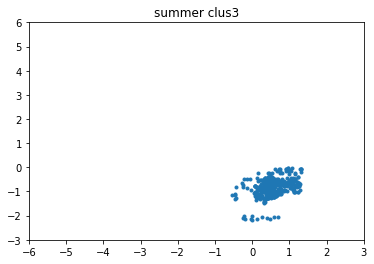

In [42]:
plt.scatter(xs3,ys3,marker='.')
plt.title('summer clus3')
plt.xlim(-6,3)
plt.ylim(-3,6)

(-3.0, 6.0)

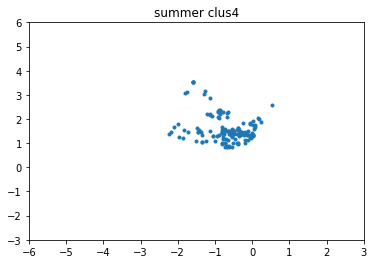

In [43]:
plt.scatter(xs4,ys4,marker='.')
plt.title('summer clus4')
plt.xlim(-6,3)
plt.ylim(-3,6)

(-3.0, 6.0)

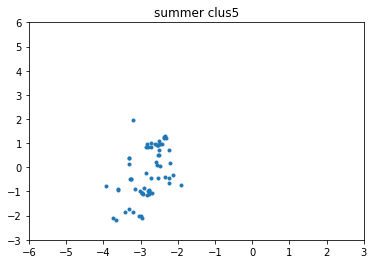

In [44]:
plt.scatter(xs5,ys5,marker='.')
plt.title('summer clus5')
plt.xlim(-6,3)
plt.ylim(-3,6)

In [45]:
y_pred_summer_coyo = coyo_summer_kmeans.fit_predict(coyo_summer_scaled)
y_pred_fall_coyo = coyo_fall_kmeans.fit_predict(coyo_fall_scaled)
y_pred_winter_coyo = coyo_winter_kmeans.fit_predict(coyo_winter_scaled)
y_pred_spring_coyo = coyo_spring_kmeans.fit_predict(coyo_spring_scaled)

In [46]:
coyo_summer_labels = coyo_summer_kmeans.labels_
realClusterNum_summer_coyo = len(set(coyo_summer_labels))-(1 if -1 in coyo_summer_labels else 0)
clusterNum_summer_coyo = len(set(coyo_summer_labels))
print("realclusterNum_summer_coyo",realClusterNum_summer_coyo)
print("clusterNum_summer_coyo",clusterNum_summer_coyo)

coyo_fall_labels = coyo_fall_kmeans.labels_
realClusterNum_fall_coyo = len(set(coyo_fall_labels))-(1 if -1 in coyo_fall_labels else 0)
clusterNum_fall_coyo = len(set(coyo_fall_labels))
print("realclusterNum_fall_coyo",realClusterNum_fall_coyo)
print("clusterNum_fall_coyo",clusterNum_fall_coyo)

coyo_winter_labels = coyo_winter_kmeans.labels_
realClusterNum_winter_coyo = len(set(coyo_winter_labels))-(1 if -1 in coyo_winter_labels else 0)
clusterNum_winter_coyo = len(set(coyo_winter_labels))
print("realclusterNum_winter_coyo",realClusterNum_winter_coyo)
print("clusterNum_winter_coyo",clusterNum_winter_coyo)

coyo_spring_labels = coyo_spring_kmeans.labels_
realClusterNum_spring_coyo = len(set(coyo_spring_labels))-(1 if -1 in coyo_spring_labels else 0)
clusterNum_spring_coyo = len(set(coyo_spring_labels))
print("realclusterNum_spring",realClusterNum_spring_coyo)
print("clusterNum_spring",clusterNum_spring_coyo)

realclusterNum_summer_coyo 5
clusterNum_summer_coyo 5
realclusterNum_fall_coyo 5
clusterNum_fall_coyo 5
realclusterNum_winter_coyo 5
clusterNum_winter_coyo 5
realclusterNum_spring 5
clusterNum_spring 5


Text(0.5, 1.0, 'Winter coyote')

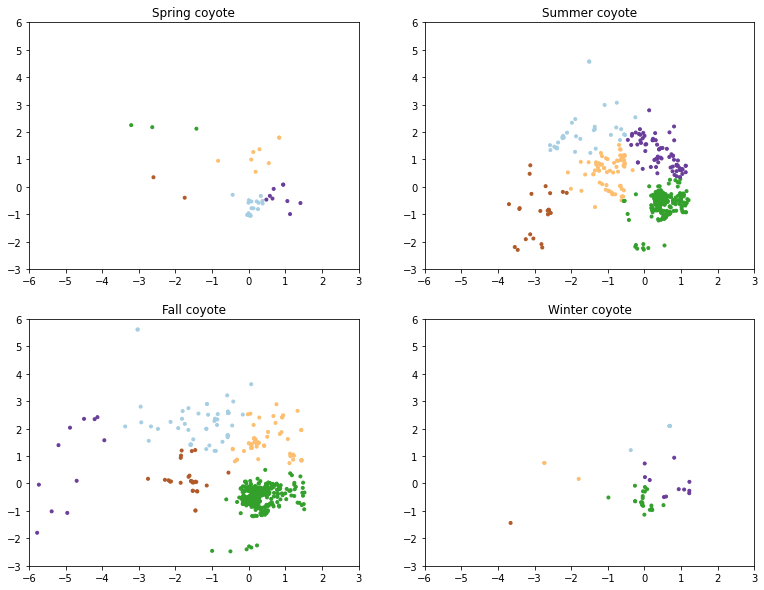

In [47]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(coyo_spring_scaled[:,0],coyo_spring_scaled[:,1],c=y_pred_spring_coyo,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote')
axs[0,1].scatter(coyo_summer_scaled[:,0],coyo_summer_scaled[:,1],c=y_pred_summer_coyo,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote')
axs[1,0].scatter(coyo_fall_scaled[:,0],coyo_fall_scaled[:,1],c=y_pred_fall_coyo,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote')
axs[1,1].scatter(coyo_winter_scaled[:,0],coyo_winter_scaled[:,1],c=y_pred_winter_coyo,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote')

In [48]:
kmeans_summer_b = KMeans(n_clusters=5)
kmeans_summer_b.fit(b_summer_scaled)
kmeans_fall_b = KMeans(n_clusters=5)
kmeans_fall_b.fit(b_fall_scaled)
kmeans_spring_b = KMeans(n_clusters=5)
kmeans_spring_b.fit(b_spring_scaled)

KMeans(n_clusters=5)

In [49]:
#black bear
b_summer_labels = kmeans_summer_b.labels_
realClusterNum_summer_b = len(set(b_summer_labels))-(1 if -1 in b_summer_labels else 0)
clusterNum_summer_b = len(set(b_summer_labels))
print("realclusterNum_summer_b",realClusterNum_summer_b)
print("clusterNum_summer_b",clusterNum_summer_b)

b_fall_labels = kmeans_fall_b.labels_
realClusterNum_fall_b = len(set(b_fall_labels))-(1 if -1 in b_fall_labels else 0)
clusterNum_fall_b = len(set(b_fall_labels))
print("realclusterNum_fall_b",realClusterNum_fall_b)
print("clusterNum_fall_b",clusterNum_fall_b)

b_spring_labels = kmeans_spring_b.labels_
realClusterNum_spring_b = len(set(b_spring_labels))-(1 if -1 in b_spring_labels else 0)
clusterNum_spring_b = len(set(b_spring_labels))
print("realclusterNum_spring_b",realClusterNum_spring_b)
print("clusterNum_spring_b",clusterNum_spring_b)

realclusterNum_summer_b 5
clusterNum_summer_b 5
realclusterNum_fall_b 5
clusterNum_fall_b 5
realclusterNum_spring_b 5
clusterNum_spring_b 5


In [50]:
y_pred_summer_b = kmeans_summer_b.fit_predict(b_summer_scaled)
y_pred_fall_b= kmeans_fall_b.fit_predict(b_fall_scaled)
y_pred_spring_b = kmeans_spring_b.fit_predict(b_spring_scaled)

Text(0.5, 1.0, 'Winter black bear')

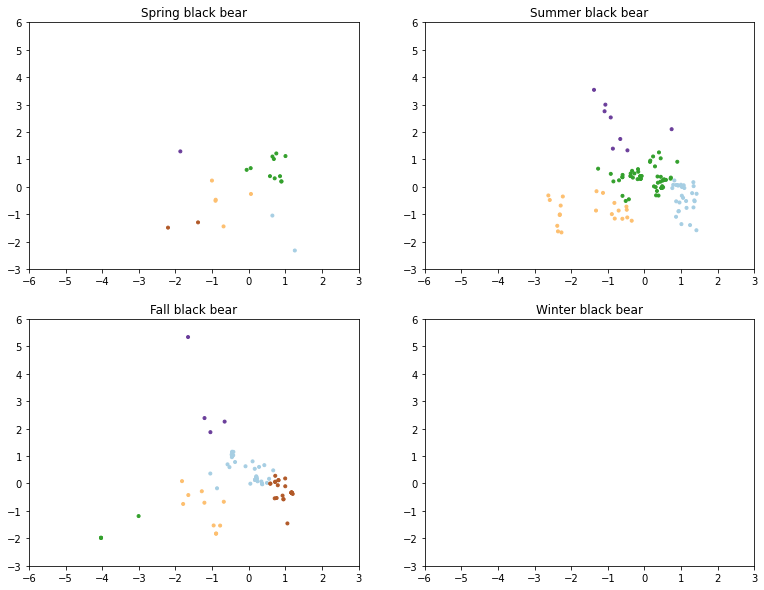

In [51]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(b_spring_scaled[:,0],b_spring_scaled[:,1],c=y_pred_spring_b,cmap='Paired',marker='.')
axs[0,0].set_title('Spring black bear')
axs[0,1].scatter(b_summer_scaled[:,0],b_summer_scaled[:,1],c=y_pred_summer_b,cmap='Paired',marker='.')
axs[0,1].set_title('Summer black bear')
axs[1,0].scatter(b_fall_scaled[:,0],b_fall_scaled[:,1],c=y_pred_fall_b,cmap='Paired',marker='.')
axs[1,0].set_title('Fall black bear')
axs[1,1].set_title('Winter black bear')

In [52]:
kmeans_summer_r = KMeans(n_clusters=5)
kmeans_summer_r.fit(r_summer_scaled)
kmeans_fall_r = KMeans(n_clusters=5)
kmeans_fall_r.fit(r_fall_scaled)
kmeans_winter_r = KMeans(n_clusters=1)
kmeans_winter_r.fit(r_fall_scaled)
kmeans_spring_r = KMeans(n_clusters=1)
kmeans_spring_r.fit(r_spring_scaled)

KMeans(n_clusters=1)

In [53]:
#raccoon
r_summer_labels = kmeans_summer_r.labels_
realClusterNum_summer_r = len(set(r_summer_labels))-(1 if -1 in r_summer_labels else 0)
clusterNum_summer_r = len(set(r_summer_labels))
print("realclusterNum_summer_r",realClusterNum_summer_r)
print("clusterNum_summer_r",clusterNum_summer_r)

r_fall_labels = kmeans_fall_r.labels_
realClusterNum_fall_r = len(set(r_fall_labels))-(1 if -1 in r_fall_labels else 0)
clusterNum_fall_r = len(set(r_fall_labels))
print("realclusterNum_fall_r",realClusterNum_fall_r)
print("clusterNum_fall_r",clusterNum_fall_r)

r_winter_labels = kmeans_winter_r.labels_
realClusterNum_winter_r = len(set(r_winter_labels))-(1 if -1 in r_winter_labels else 0)
clusterNum_winter_r = len(set(r_winter_labels))
print("realclusterNum_winter_r",realClusterNum_winter_r)
print("clusterNum_winter_r",clusterNum_winter_r)

r_spring_labels = kmeans_spring_r.labels_
realClusterNum_spring_r = len(set(r_spring_labels))-(1 if -1 in r_spring_labels else 0)
clusterNum_spring_r = len(set(r_spring_labels))
print("realclusterNum_spring_r",realClusterNum_spring_r)
print("clusterNum_spring_r",clusterNum_spring_r)

realclusterNum_summer_r 5
clusterNum_summer_r 5
realclusterNum_fall_r 5
clusterNum_fall_r 5
realclusterNum_winter_r 1
clusterNum_winter_r 1
realclusterNum_spring_r 1
clusterNum_spring_r 1


In [54]:
y_pred_summer_r = kmeans_summer_r.fit_predict(r_summer_scaled)
y_pred_fall_r= kmeans_fall_r.fit_predict(r_fall_scaled)
y_pred_winter_r= kmeans_winter_r.fit_predict(r_winter_scaled)
y_pred_spring_r = kmeans_spring_r.fit_predict(r_spring_scaled)

Text(0.5, 1.0, 'Winter racoon')

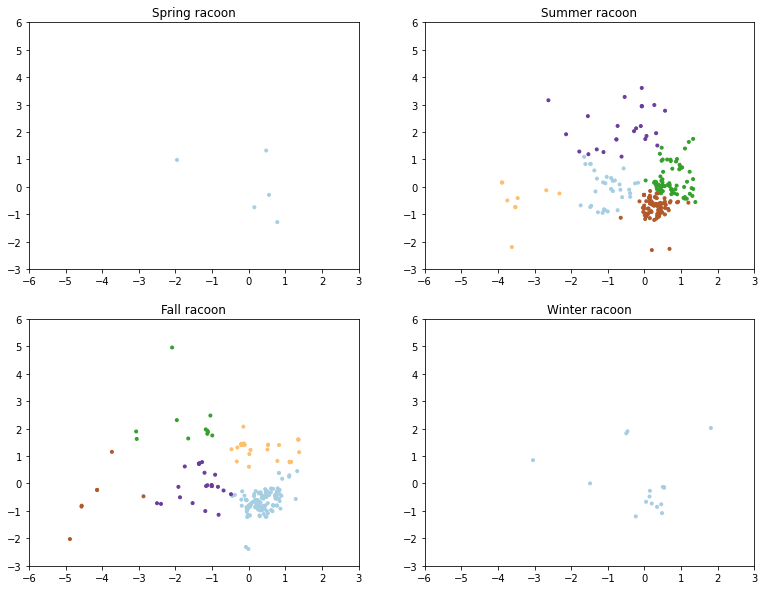

In [55]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(r_spring_scaled[:,0],r_spring_scaled[:,1],c=y_pred_spring_r,cmap='Paired',marker='.')
axs[0,0].set_title('Spring racoon')
axs[0,1].scatter(r_summer_scaled[:,0],r_summer_scaled[:,1],c=y_pred_summer_r,cmap='Paired',marker='.')
axs[0,1].set_title('Summer racoon')
axs[1,0].scatter(r_fall_scaled[:,0],r_fall_scaled[:,1],c=y_pred_fall_r,cmap='Paired',marker='.')
axs[1,0].set_title('Fall racoon')
axs[1,1].scatter(r_winter_scaled[:,0],r_winter_scaled[:,1],c=y_pred_winter_r,cmap='Paired',marker='.')
axs[1,1].set_title('Winter racoon')

In [56]:
kmeans_summer_cbr = KMeans(n_clusters=5)
kmeans_summer_cbr.fit(cbr_summer_scaled)
kmeans_fall_cbr = KMeans(n_clusters=5)
kmeans_fall_cbr.fit(cbr_fall_scaled)
kmeans_winter_cbr = KMeans(n_clusters=2)
kmeans_winter_cbr.fit(cbr_fall_scaled)
kmeans_spring_cbr = KMeans(n_clusters=3)
kmeans_spring_cbr.fit(cbr_spring_scaled)

KMeans(n_clusters=3)

In [57]:
#cbr
cbr_summer_labels = kmeans_summer_cbr.labels_
realClusterNum_summer_cbr = len(set(cbr_summer_labels))-(1 if -1 in cbr_summer_labels else 0)
clusterNum_summer_cbr = len(set(cbr_summer_labels))
print("realclusterNum_summer_cbr",realClusterNum_summer_cbr)
print("clusterNum_summer_cbr",clusterNum_summer_cbr)

cbr_fall_labels = kmeans_fall_cbr.labels_
realClusterNum_fall_cbr = len(set(cbr_fall_labels))-(1 if -1 in cbr_fall_labels else 0)
clusterNum_fall_cbr = len(set(cbr_fall_labels))
print("realclusterNum_fall_cbr",realClusterNum_fall_cbr)
print("clusterNum_fall_cbr",clusterNum_fall_cbr)

cbr_winter_labels = kmeans_winter_cbr.labels_
realClusterNum_winter_cbr = len(set(cbr_winter_labels))-(1 if -1 in cbr_winter_labels else 0)
clusterNum_winter_cbr = len(set(cbr_winter_labels))
print("realclusterNum_winter_cbr",realClusterNum_winter_cbr)
print("clusterNum_winter_cbr",clusterNum_winter_cbr)

cbr_spring_labels = kmeans_spring_cbr.labels_
realClusterNum_spring_cbr = len(set(cbr_spring_labels))-(1 if -1 in cbr_spring_labels else 0)
clusterNum_spring_cbr = len(set(cbr_spring_labels))
print("realclusterNum_spring_cbr",realClusterNum_spring_cbr)
print("clusterNum_spring_cbr",clusterNum_spring_cbr)

realclusterNum_summer_cbr 5
clusterNum_summer_cbr 5
realclusterNum_fall_cbr 5
clusterNum_fall_cbr 5
realclusterNum_winter_cbr 2
clusterNum_winter_cbr 2
realclusterNum_spring_cbr 3
clusterNum_spring_cbr 3


In [58]:
#creating y axis values
y_pred_summer_cbr = kmeans_summer_cbr.fit_predict(cbr_summer_scaled)
y_pred_fall_cbr = kmeans_fall_cbr.fit_predict(cbr_fall_scaled)
y_pred_winter_cbr = kmeans_winter_cbr.fit_predict(cbr_winter_scaled)
y_pred_spring_cbr = kmeans_spring_cbr.fit_predict(cbr_spring_scaled)

Text(0.5, 1.0, 'Winter coyote, bear, and racoon')

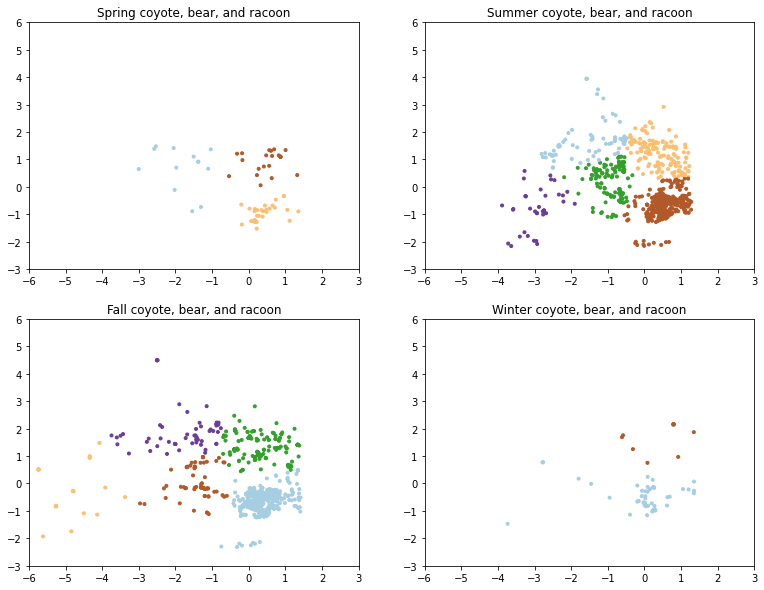

In [59]:
#plot clusters
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(cbr_spring_scaled[:,0],cbr_spring_scaled[:,1],c=y_pred_spring_cbr,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote, bear, and racoon')
axs[0,1].scatter(cbr_summer_scaled[:,0],cbr_summer_scaled[:,1],c=y_pred_summer_cbr,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote, bear, and racoon')
axs[1,0].scatter(cbr_fall_scaled[:,0],cbr_fall_scaled[:,1],c=y_pred_fall_cbr,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote, bear, and racoon')
axs[1,1].scatter(cbr_winter_scaled[:,0],cbr_winter_scaled[:,1],c=y_pred_winter_cbr,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote, bear, and racoon')